In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder, CatBoostEncoder, WOEEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore') 


#### Definição do Problema:

- x possui um problema com a retenção de colaboradores;

##### Primeiros passos: 
    - Explorar os dados e descobrir o quão grande esse problema pode ser para a empresa;
    - Descobrir quais variáveis são mais importantes para a saída de colaboradores;
    - Enteneder se podemos prever a saída de colaboradores;
    - Entender o Trade off de se manter um colaborador, ou deixar que ele saia.



In [81]:
rh = pd.read_csv(".\DATA\WA_Fn-UseC_-HR-Employee-Attrition.csv")

Conhecendo o rhset

In [82]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [83]:
rh.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [84]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [85]:
rh.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [86]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [87]:
rh.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [88]:
rh.Gender.value_counts()

male = rh['Gender'].value_counts()['Male']
female = rh['Gender'].value_counts()['Female']


male_percentage = (male / len(rh))*100
female_percentage = (female / len(rh)) *100

print(f'o percentual de colaboradores do sexo masculino é: {male_percentage}%')
print(f'o percentual de colaboradores do sexo Feminino é: {female_percentage}%')



o percentual de colaboradores do sexo masculino é: 60.0%
o percentual de colaboradores do sexo Feminino é: 40.0%


In [89]:
rh.describe().round()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,37.0,802.0,9.0,3.0,1.0,1025.0,3.0,66.0,3.0,2.0,...,3.0,80.0,1.0,11.0,3.0,3.0,7.0,4.0,2.0,4.0
std,9.0,404.0,8.0,1.0,0.0,602.0,1.0,20.0,1.0,1.0,...,1.0,0.0,1.0,8.0,1.0,1.0,6.0,4.0,3.0,4.0
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,...,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.0,2.0,48.0,2.0,1.0,...,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.0,3.0,66.0,3.0,2.0,...,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1556.0,4.0,84.0,3.0,3.0,...,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,...,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


Vamos verificar o percentual de colaboradores que deixaram a empresa

In [90]:
# Criando variáveis separadas para cada classe na coluna 'Attrition'
attrition_yes_count = rh['Attrition'].value_counts()[1]
attrition_no_count = rh['Attrition'].value_counts()[0]


total = len(rh)
percentual_attrition = (attrition_yes_count / total) *100

print(f'o total de colaboradores da empresa x é de:', total)
print(f'dos quais {attrition_yes_count} deixaram a empresa')
print(f'representando {percentual_attrition.round(2)}% do total de colaboradores')
print(f'a quantidade de colaboradores que permaneceram na empresa é de:', attrition_no_count)

o total de colaboradores da empresa x é de: 1470
dos quais 237 deixaram a empresa
representando 16.12% do total de colaboradores
a quantidade de colaboradores que permaneceram na empresa é de: 1233


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

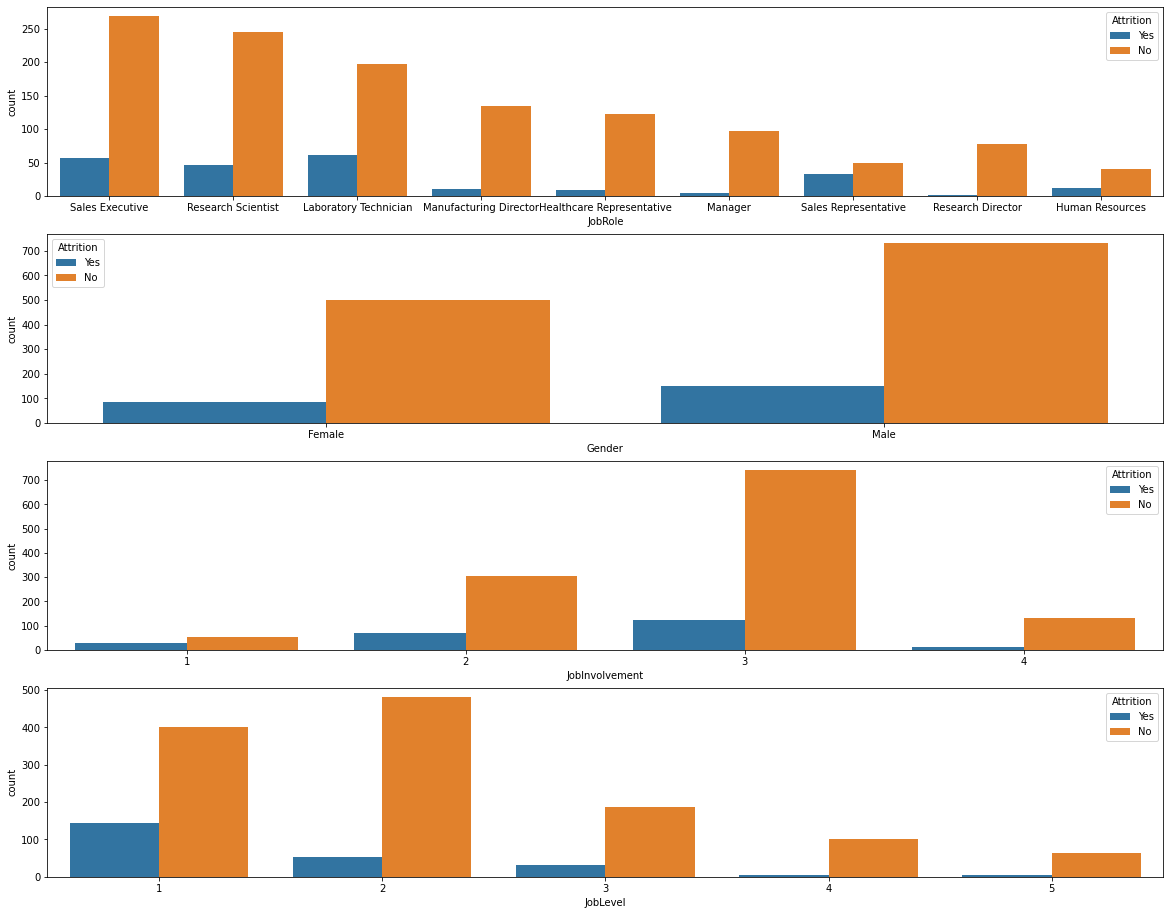

In [91]:
plt.figure(figsize=[20,16])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = rh)
plt.subplot(412)
sns.countplot(x = 'Gender', hue = 'Attrition', data = rh)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = rh)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = rh)



Executivos de vendas, pesquisadores, tecnicos de laboratorio e representantes de vendas são os postos mais afetados pela saida de colaboradores;

Parece não haver diferença significativa quando se trata de genero;

O nivel de envolvimento parece não ter uma influencia na saída de colaboradores;

Colaboradores nivel 1  e 2 tem uma maior tendencia a saída;

##### Proximas analises:
   - Agora que sabemos quais são os departamentos em que há mais saída de colaboradores, vamos descobrir quais fatores levam esses colaboradores a saírem;
    Será que o salário exerce influência na saída de colaboradores?



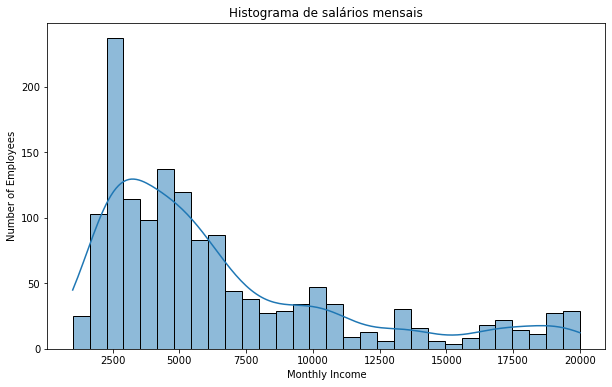

In [92]:
# Creating a histogram for the 'MonthlyIncome' column

plt.figure(figsize=(10, 6))
sns.histplot(rh['MonthlyIncome'], bins=30, kde=True)
plt.title('Histograma de salários mensais')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.show()


Os salários estão distribuídos entre R$ 1009,00 e R$ 19.999,00

Dadas as informações de distribuição dos salários, vamos classificar os salários em 4 niveis: baixo, medio, alto e muito alto baseado nos quartis dos dados

salarios abaixo do primeiro quartil (25% dos dados) vamos considerar como baixos

Salarios até 50% dos dados, vamos considerar como médio

salarios de 50 a 75% dos dados, vamos considerar como alto

e acima de 75% iremos considerar como alto



In [93]:
rh['MonthlyIncome'].describe().round(2)

count     1470.00
mean      6502.93
std       4707.96
min       1009.00
25%       2911.00
50%       4919.00
75%       8379.00
max      19999.00
Name: MonthlyIncome, dtype: float64

In [94]:
quartiles = rh['MonthlyIncome'].quantile([0.25, 0.5, 0.75])

# Criando uma função para categorizar os salários
def categorize_salary(salary):
    if salary <= quartiles[0.25]:
        return 'Baixo'
    elif salary <= quartiles[0.5]:
        return 'Médio'
    elif salary <= quartiles[0.75]:
        return 'Alto'
    else:
        return 'Muito Alto'

# Aplicando a função na coluna 'MonthlyIncome' para criar a nova coluna 'NivelSalarial'
rh['NivelSalarial'] = rh['MonthlyIncome'].apply(categorize_salary)

In [95]:
count_by_jobrole_and_salary = rh.groupby(['JobRole', 'NivelSalarial']).size().unstack().reset_index().fillna(0)
count_by_jobrole_and_salary.sort_values(by='Baixo', ascending=False)

NivelSalarial,JobRole,Alto,Baixo,Muito Alto,Médio
6,Research Scientist,30.0,152.0,1.0,109.0
2,Laboratory Technician,25.0,130.0,0.0,104.0
8,Sales Representative,2.0,64.0,0.0,17.0
1,Human Resources,12.0,23.0,5.0,12.0
0,Healthcare Representative,66.0,0.0,45.0,20.0
3,Manager,0.0,0.0,102.0,0.0
4,Manufacturing Director,68.0,0.0,46.0,31.0
5,Research Director,0.0,0.0,80.0,0.0
7,Sales Executive,164.0,0.0,89.0,73.0


In [96]:
average_salary_by_jobrole_and_category = rh.groupby(['JobRole'])['MonthlyIncome'].mean().fillna(0).round(2)

average_salary_by_jobrole_and_category

JobRole
Healthcare Representative     7528.76
Human Resources               4235.75
Laboratory Technician         3237.17
Manager                      17181.68
Manufacturing Director        7295.14
Research Director            16033.55
Research Scientist            3239.97
Sales Executive               6924.28
Sales Representative          2626.00
Name: MonthlyIncome, dtype: float64

In [97]:
average_salary_by_salary_category = rh.groupby('NivelSalarial')['MonthlyIncome'].mean().round(2)
average_salary_by_salary_category

NivelSalarial
Alto           6181.74
Baixo          2354.13
Muito Alto    13508.35
Médio          3964.10
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

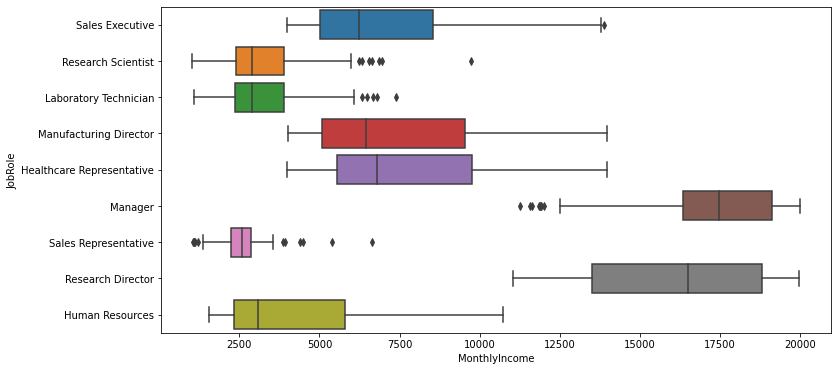

In [98]:
#Analisando os salários por departamento
plt.figure(figsize=[12,6])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=rh)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='EducationField'>

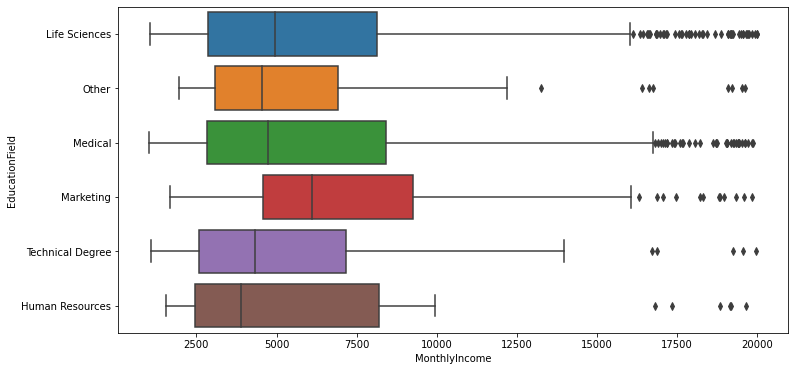

In [99]:
#Analisando os salários por área de formação
plt.figure(figsize=[12,6])
sns.boxplot(x = 'MonthlyIncome', y = 'EducationField', data=rh)

##### Salarios:
    Os salarios das funções citadas anteriormente são de fato menores, quando comparadas as demais funções
    Vamos plotar um grafico de correlação, para ver se encontramos algumas correlações importantes

In [100]:
# Calcular o percentual de 'Yes' em 'Attrition' para cada 'JobRole'
attrition_by_jobrole = rh.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
percent_yes_attrition = attrition_by_jobrole['Yes'] * 100

# Preparar os dados para plotagem
percent_yes_attrition_sorted = percent_yes_attrition.sort_values(ascending=False)
percent_yes_attrition_sorted.round(2)


JobRole
Sales Representative         39.76
Laboratory Technician        23.94
Human Resources              23.08
Sales Executive              17.48
Research Scientist           16.10
Manufacturing Director        6.90
Healthcare Representative     6.87
Manager                       4.90
Research Director             2.50
Name: Yes, dtype: float64

In [101]:
#Separando o dataframe em colaboradores que saíram e que não sairam
left_rh = rh[rh['Attrition'] == "Yes"]
stayed_rh = rh[rh['Attrition'] == "No"]

In [102]:
left_rh

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NivelSalarial
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Alto
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Baixo
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,80,0,6,4,3,4,2,0,3,Baixo
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,80,0,10,4,3,5,3,0,3,Médio
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,80,0,8,2,3,4,2,1,3,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,80,1,1,3,2,1,0,1,0,Baixo
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,80,3,4,3,4,2,2,2,2,Médio
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,80,1,14,4,1,10,9,9,8,Baixo
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,80,2,12,3,3,6,3,0,1,Alto


Vamos Estimas a densidade dos salários das pessoas que saíram da empresa



<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

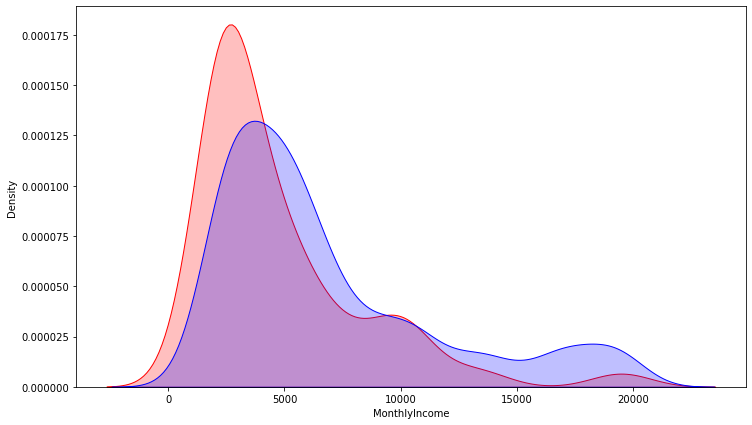

In [103]:
#implementando KDE(Kernel Density estimate)
plt.figure(figsize=[12,7])
sns.kdeplot(left_rh['MonthlyIncome'], label= 'Funcionários que saíram', shade=True, color = 'r')
sns.kdeplot(stayed_rh['MonthlyIncome'], label= 'Funcionários que ficaram', shade=True, color = 'b')


##### O Kernel de Densidade de probabilidade nos mostra uma area mais concentrada a esquerda,o que pode indicar que os colaboradores que saíram tem salários menores que os que pernaceram
##### Para enriquecer nossa analise, vamos aplicar um teste de hipoteses para saber se essa diferença é significativa


In [104]:
# Usando .loc para extrair os dados de 'MonthlyIncome'
income_yes = rh.loc[rh['Attrition'] == "Yes", 'MonthlyIncome']
income_no = rh.loc[rh['Attrition'] == "No", 'MonthlyIncome']


In [105]:
import numpy as np
from scipy.stats import ttest_ind

# Determinando o tamanho da menor amostra
min_sample_size = min(len(income_yes), len(income_no))

# Realizando uma amostragem aleatória para igualar os tamanhos das amostras
np.random.seed(0)  # Para reprodutibilidade
sampled_income_yes = np.random.choice(income_yes, min_sample_size, replace=False)
sampled_income_no = np.random.choice(income_no, min_sample_size, replace=False)

# Aplicando o teste t de Welch nas amostras igualadas
t_statistic_sampled, p_value_sampled = ttest_ind(sampled_income_yes, sampled_income_no, equal_var=False)

t_statistic_sampled, p_value_sampled

p_valor_formatado = "{:.10f}".format(p_value_sampled)

if float(p_valor_formatado) < 0.05:
    print(f'O valor de P é:{p_valor_formatado} indica que há uma diferença significativa entre os salarios dos colaboradores que sairam e os que ficaram')
else:
    print(f'O valor de P é:{p_valor_formatado}, indica que não há diferença signigicativa entre os salarios dos colaboradores que sairam e os que permaneceram')




O valor de P é:0.0000004751 indica que há uma diferença significativa entre os salarios dos colaboradores que sairam e os que ficaram


Temos agora um indicativo de que insatisfação salarial pode ter influencia na saída dos colaboradores

E Quais variáveis tem influencia sobre o salário?

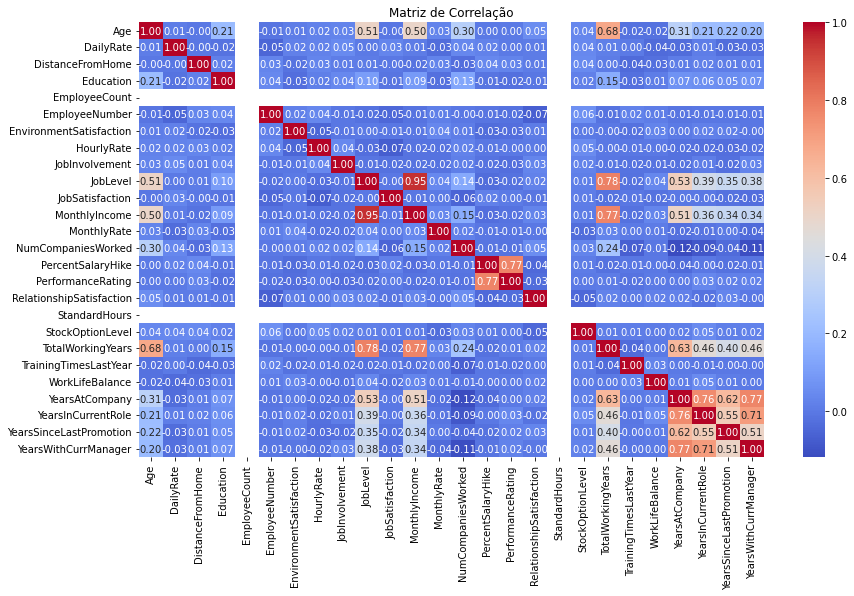

In [106]:
# Calculando a matriz de correlação
correlation_matrix = rh.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

##### Influência Salarial:

- As Principais variáveis que influênciam o salário são: JobLevel e TotalworkYears

- O que pode significar que pessoas com menos experiência de mercado, consequentemente ganham menos e talvez estejam mais abertas a novas experiências

In [107]:
rh['Attrition'] = rh.Attrition.map({"No": 0,"Yes":1})

#### Preparando os dados para aplicação de predição

In [108]:
X = rh.drop('Attrition', axis=1)
y = rh['Attrition']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

##### Peso das Classes:

- Como vimos anteriormente, temos classes desbalanceadas, já que apenas 16.12% dos nossos dados são da classe positiva (pessoas que sairam da empresa)
Nesse contexto é importante pensar numa forma de balancear nossas classes, e o compute_class_weight do sklearn fará isso, dando pesos diferentes, Diminuindo o peso da classe negativa e aumentando o peso da classe positiva.

In [110]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

In [111]:
weight_dict

{0: 0.6074380165289256, 1: 2.826923076923077}

In [112]:
numeric_feature = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_feature = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

In [113]:
numeric_transformer = Pipeline(steps=[("imputer", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[("encoder", TargetEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer ,categorical_feature)]
)

#numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy='median'))])

In [114]:
pipeline = Pipeline(steps=[("prepocessor", preprocessor),
                           ("select", SelectKBest(f_classif,k=20)),
                           ("classifier", LogisticRegression(class_weight=weight_dict))])

#class_weight=weight_dict

In [115]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHi...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime',
                                                   'NivelSalarial'])])),
                ('select', SelectKBest(k=20)),
                ('classifier',
                 LogisticRegression(class_weight={0: 0.6074380165289256,
                                                  1: 2.826923076923077}))])

In [116]:
y_pred = pipeline.predict(X_test)

In [117]:
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred)}")
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}")

y_pred_proba = pipeline.predict_proba(X_test)
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba[:,1])}")

Precision: 0.3515151515151515
Recall: 0.7160493827160493
F1: 0.47154471544715443
accuracy_score: 0.7789115646258503
ROC AUC: 0.8105291353154601


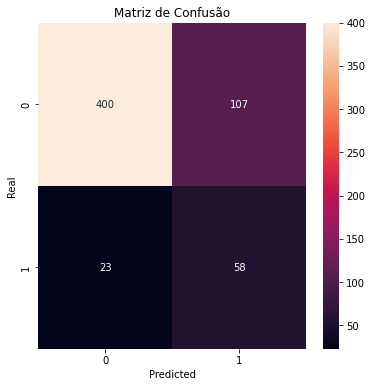

In [118]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.title("Matriz de Confusão")
plt.show()

- Precision: Das pessoas que nosso modelo previu que iriam sair, 35% realmente saíram 
- Recall: De todos que realmente saíram, nosso modelo previu 71% 

In [119]:
print(len(y_test))

588


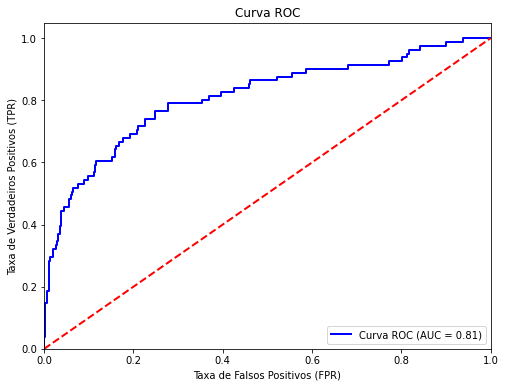

In [120]:
from sklearn.metrics import roc_curve

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# Calcula a área sob a curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])

# Plota a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

##### ROC AUC:
- A AUC (área sob a curva) nos indica quão melhor nosso modelo performa em relação a uma escolha aleatória

- Um modelo cuja performance está muito proxima de 50% não vale a pena subir, pois seria a mesma coisa que uma escolha aleatória

In [121]:
results = []

for thres in np.arange(0.05, 1, 0.05):

    y_pred = (pipeline.predict_proba(X_test)[:,1]>thres)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)

    results.append((thres, precision, recall,f1,acc))

In [122]:
result_rh = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "acc"])

##### threshold(Limiar de decisão):

- Se tratando de classificação, nosso modelo considera como positiva uma instancia que tem mais de 50% de chance de ser positiva Exemplo:

- Se uma instancia tem 51% de chance de ser positiva, tem também 49% de ser negativa. Mas concoda que 49% ainda pode ser um numero muito alto?

- Sendo assim, podemos Alterar o limite de decisão do nosso modelo. Por exemplo... Podemos considerar que 35% de chance de perder um colaborador já é um alto risco.
Mas é sempre uma troca... Diminuir o limiar de decisão, em geral aumenta o recall do nosso modelo, mas também diminui a precisão do nosso modelo. O que aumenta a taxa de falsos positivos detectados pelo nosso modelo


- Apesar dessa explição, iremos trabalhar com o threshold padrão :)

In [123]:
result_rh

,thres,precision,recall,f1,acc
0,0.05,0.139175,1.000000,0.244344,0.147959
1,0.10,0.145191,0.987654,0.253165,0.197279
2,0.15,0.153696,0.975309,0.265546,0.256803
3,0.20,0.161220,0.913580,0.274074,0.333333
4,0.25,0.179803,0.901235,0.299795,0.420068
5,0.30,0.206395,0.876543,0.334118,0.518707
6,0.35,0.225914,0.839506,0.356021,0.581633
7,0.40,0.263158,0.802469,0.396341,0.663265
8,0.45,0.305419,0.765432,0.436620,0.727891
9,0.50,0.351515,0.716049,0.471545,0.778912


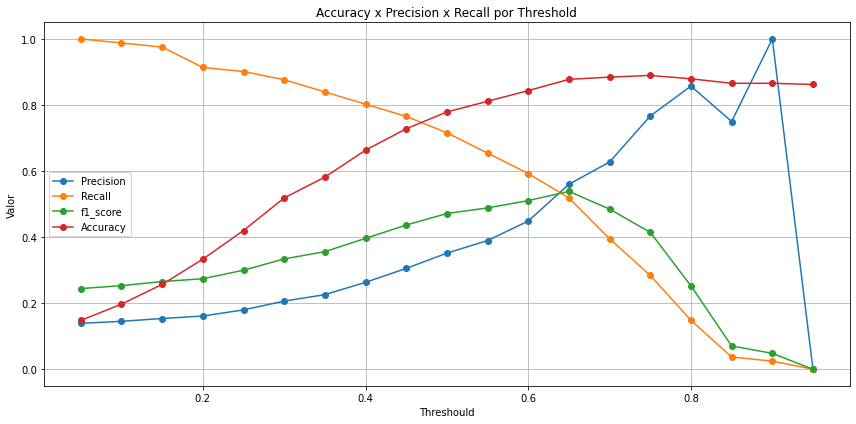

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
plt.plot(result_rh["thres"], result_rh['precision'], label="Precision", marker='o')
plt.plot(result_rh["thres"], result_rh['recall'], label="Recall", marker='o')
plt.plot(result_rh["thres"], result_rh['f1'], label="f1_score", marker='o')
plt.plot(result_rh["thres"], result_rh['acc'], label="Accuracy", marker='o')

plt.title("Accuracy x Precision x Recall por Threshold")
plt.xlabel("Threshould")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Trade off
- Será que vale a pena subir o modelo?

Depende de qual será o custo da estratégia de retenção adotada pelo dpto de recursos humanos.

Nós vimos anteriormente que as pessoas que tendem a sair da empresa, em geral são pessoas mais jovens, e se tem uma coisa que o jovem gosta é de ser fitness né? :)

E se a estratégia da empresa for oferecer um gympass para quem está mais propenso a sair?

Supondo que o gympass tem uma taxa de aceitação do gympass é de 70%

Nosso modelo prevê que 81 pessoas irão sair, sendo que dessas 58 saem e 23 não saem

Vamos oferecer o gympass para as 58 pessoas,sendo que 40 permanecem mas 18 saem. Então gatamos 18 gympass que não precisavamos ter gasto

##### Valeu a pena?

Cenário 1: Supondo que o custo com a saída de cada uma dessas pessoas seria de 1500 reais e o custo do gympass por pessoa seria de 220 reais. Portanto economizamos 60.000 reais (40 * 1500) mas gastamos 12.760 (58*220). o que resultou numa economia de 47.240 Valeu a pena! Podemos subir o modelo

Cenário 2: Supondo que o custo com a saída de cada uma dessas pessoas seria de 2500 reais e o custo do gympass por pessoa seria de 350 reais. Portanto economizamos 100.000 reais (40 * 2500) mas gastamos 20.300 (58*350). o que resultou numa economia de 79.700 Valeu a pena! Podemos subir o modelo

Cenário 3: Supondo que o custo com a saída de cada uma dessas pessoas seria de 1500 reais e o custo do gympass por pessoa seria de 1500 reais. Portanto economizamos 60.000 reais (40 * 1500) mas gastamos 87.000 (58*1500). o que resultou num prejuízo de 17.000 Não vale a pena subir o modelo.


Portanto, subir ou não o modelo é uma decisão de depende do trade off, conforme demostrado nos cenários acima.